## 今天的作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，我們取 Titanic_train.csv 的年齡資料，試著將課堂中所學的方法應用上去。

* Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。  
* Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。  
*  Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
import sklearn
print(sklearn.__version__)

import pingouin as pg
import researchpy   

0.23.2


## Load data

In [8]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
df_train['Survived_cate']=df_train['Survived']
df_train['Survived_cate']=df_train['Survived_cate'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [10]:
complete_data=df_train[['Age','Survived_cate','Sex']].dropna()
complete_data

,Age,Survived_cate,Sex
0,22.0,0,male
1,38.0,1,female
2,26.0,1,female
3,35.0,1,female
4,35.0,0,male
...,...,...,...
885,39.0,0,female
886,27.0,0,male
887,19.0,1,female
889,26.0,1,male


### Q1: 產生一個新的變數(Age_above65_) Age>=65為 'Y'，其餘為'N'。


In [11]:
def test_age_above65(x):
    if x >= 65:
        return 'Y'
    elif x < 65:
        return 'N'

In [12]:
complete_data['Age_above65_'] = complete_data['Age'].apply(test_age_above65)
complete_data

,Age,Survived_cate,Sex,Age_above65_
0,22.0,0,male,N
1,38.0,1,female,N
2,26.0,1,female,N
3,35.0,1,female,N
4,35.0,0,male,N
...,...,...,...,...
885,39.0,0,female,N
886,27.0,0,male,N
887,19.0,1,female,N
889,26.0,1,male,N


### Q2: 添加女性和男性，產生一個新的變數(Age_above65_female)，女性或Age>=65為'Y'，其餘為'N'。

In [13]:
def test_age_above65_or_female(df):
    if df.Sex == 'female':
        return 'Y'
    else:
        if df.Age >= 65:
            return 'Y'
        elif df.Age < 65:
            return 'N'

In [16]:
complete_data['Age_above65_female'] = complete_data[['Age', 'Sex']].apply(test_age_above65_or_female, axis = 1)
complete_data

,Age,Survived_cate,Sex,Age_above65_,Age_above65_female
0,22.0,0,male,N,N
1,38.0,1,female,N,Y
2,26.0,1,female,N,Y
3,35.0,1,female,N,Y
4,35.0,0,male,N,N
...,...,...,...,...,...
885,39.0,0,female,N,Y
886,27.0,0,male,N,N
887,19.0,1,female,N,Y
889,26.0,1,male,N,N


### Q3: 透過昨天課程的內容，驗證產生的兩個新變數，哪一個和目標變數(Survived_cate)的相關性較高?    

# Try 'Age_above65' first

In [18]:
# Use Cramer's V
contTable = pd.crosstab(complete_data['Age_above65_'], complete_data['Survived_cate'])
contTable

Survived_cate,0,1
Age_above65_,,
N,414,289
Y,10,1


In [19]:
dof = min(contTable.shape[0], contTable.shape[1]) - 1
dof

1

In [23]:
crosstab, res = researchpy.crosstab(complete_data['Survived_cate'], complete_data['Age_above65_'], test = 'chi-square')
print("Cramer's value is", res.loc[2 ,'results'])

Cramer's value is 0.0803


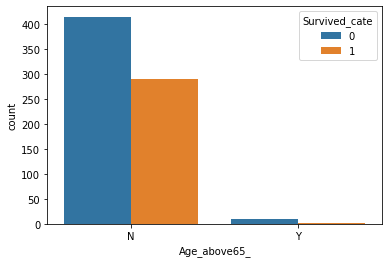

In [24]:
sns.countplot(data = complete_data, x = 'Age_above65_', hue = 'Survived_cate')
plt.show()

It seems no correlation between 'Age' and 'Survived'

# Try 'Age_above65_female' now

In [25]:
# Also use Cramer's V
contTable = pd.crosstab(complete_data['Age_above65_female'], complete_data['Survived_cate'])
contTable

Survived_cate,0,1
Age_above65_female,,
N,350,92
Y,74,198


In [26]:
dof = min(contTable.shape[0], contTable.shape[1]) - 1
dof

1

In [27]:
crosstab, res = researchpy.crosstab(complete_data['Survived_cate'], complete_data['Age_above65_female'], test = 'chi-square')
print("Cramer's value is", res.loc[2 ,'results'])

Cramer's value is 0.514


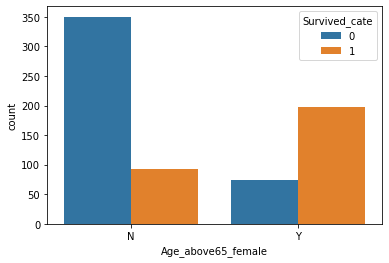

In [28]:
sns.countplot(data = complete_data, x = 'Age_above65_female', hue = 'Survived_cate')
plt.show()

There is a large correlation between 'Age_above65_female' and 'Survived_cate'